### learn about apriltags - 20221218 CJH
* cloned the https://github.com/AprilRobotics/apriltag-imgs repo
* looking in the 16h5 dir

In [2]:
# some stuff I need
import glob
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

#### pieces of code we'll need to put evertything together

In [3]:
cd apriltag-imgs/tag16h5/

C:\Cory\python\FRC_training\apriltag\apriltag-imgs\tag16h5


In [4]:
pwd

'C:\\Cory\\python\\FRC_training\\apriltag\\apriltag-imgs\\tag16h5'

In [5]:
# load all the images
pngs = glob.glob('tag16*.png')
pngs[0]

'tag16_05_00000.png'

In [6]:
# how to load an array - gotta call it grayscale
# could also have done it with matplotlib and gone directly to numpy
a = cv2.imread(pngs[0], cv2.IMREAD_GRAYSCALE)
a = np.array(a)  # convert to numpy
a[a==255] = 1  # convert to binary
a

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1]], dtype=uint8)

In [7]:
a[2:-2,2:-2].flatten()  # take off the white border and the black border

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1], dtype=uint8)

In [8]:
np.array2string(a[2:-2,2:-2].flatten(), separator='')[1:-1]  # just the relevant data as a string 

'0010001100011011'

#### make functions to analyze the 16h5 png files and return codes

In [9]:
# turn that into a function so we can loop through all the stuff
def get_tag_code(tag_png):
    img = cv2.imread(tag_png, cv2.IMREAD_GRAYSCALE)  # load the image
    arr = np.array(img)  # turn it into an array
    arr[arr==255] = 1  # file is all 255s or 0s, so set the 255s to 1 (now we have binary)
    arr_data = arr[2:-2,2:-2].flatten()  # get rid of the borders
    code_string = np.array2string(arr_data, separator='')[1:-1]  # get a simple string of 1s and 0s
    return arr, arr_data, code_string

In [10]:
# load all 29 into a dataframe
tag_dict = {}
array_data_list = []
for png in pngs:
    idx = png[-6:-4]  # the id of the tag, from 0 to 20
    arr, arr_data, code_string = get_tag_code(png)
    tag_dict.update({idx:{'ID':idx,'ARRAY':arr_data, 'CODE':code_string}})
    array_data_list.append(arr)
    #tag_dict.update({idx:{'id':idx, 'code':code_string}})
df = pd.DataFrame(tag_dict).transpose()

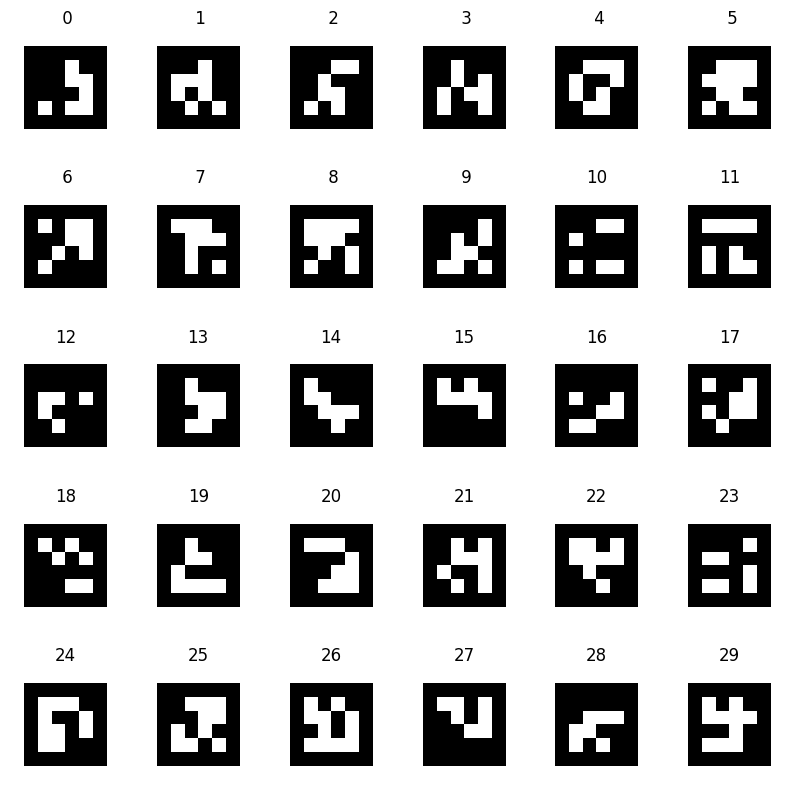

In [41]:
# let's have a look at these tags
fig, axs = plt.subplots(5,6, figsize=(10,10))
for idx, (ax, arr) in enumerate(zip(axs.flatten(), array_data_list)):
    ax.imshow(arr, cmap='gray')
    ax.set_axis_off()
    ax.set_title(f'{idx:2d}')

In [12]:
df

,ID,ARRAY,CODE
00,00,"[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]",0010001100011011
01,01,"[0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1]",0010111010100101
02,02,"[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0]",0011010001101010
03,03,"[0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1]",0100010110111001
04,04,"[0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0]",0111100110100110
05,05,"[0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1]",0111111101101011
06,06,"[1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]",1011001101011000
07,07,"[1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1]",1110011101000101
08,08,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1]",1111111001011001
09,09,"[0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1]",0001010101101101


#### Hamming distances - the minimum number of substitutions necessary to get from one string to another
* https://en.wikipedia.org/wiki/Hamming_distance
* with array a and array b of same shape, hamming_distance = np.count_nonzero(a!=b)

In [13]:
# get the table of hamming distances for each of the Apriltag targets
hamming_dict = {}
hamming_data = []
for idx in df['ID']:
    for idy in df['ID']:
        hamming = np.count_nonzero(df.iloc[int(idx)]['ARRAY']!=df.iloc[int(idy)]['ARRAY'])
        hamming_dict.update({idx+idy:{'row':idx, 'col':idy, 'hamming':hamming}})
        hamming_data.append(hamming)

In [15]:
reshape_hamming = np.array(hamming_data).reshape(30,30)
rows = list(range(30))
cols = list(range(30))
pd.set_option('display.max_columns', 30)
hamming_df = pd.DataFrame(reshape_hamming, columns=cols, index=rows)

# just being cute with the df
font_size = 11
styles = [{'selector': 'caption', 'props': [('text-align', 'center'),  ('font-weight', 'bold'),  ('font-size', f'{font_size}pt'),  ('color', 'black'),  ('padding', '0.3em')]},
          {'selector': 'th', 'props': [('text-align', 'center'),  ('font-weight', 'bold'),  ('font-size', f'{font_size-2}pt'), ('color', 'black'),  ('padding', '0.1em'), ('min-width', '25px')]},
          {'selector': 'th.row_heading', 'props': [('text-align', 'center'),  ('font-weight', 'bold'),  ('font-size', f'{font_size-2}pt'),  ('color', 'cyan'),('background-color', 'black'),]},  # index
          {'selector': 'th.col_heading.level0', 'props': [('font-size', f'{font_size-2}pt'),('color', 'cyan'),('background-color', 'black')]}, # second row of header
          {'selector': 'td', 'props': [('text-align', 'center'), ('vertical-align', 'centre'), ('font-weight', 'bold'),('font-size', f'{font_size}px')]},  # cell
         ]
df_styled_profs = hamming_df.style\
.set_properties(**{'font-size': f'{font_size}pt','font-weight': 'bold','text-align': 'center', 'color':'#000000'})\
.set_caption(f"Hamming Distances between 16h5 tags", ).set_table_styles(styles)\
.applymap(lambda x: 'background-color : yellow' if x==0 else '')
display(df_styled_profs)

C:\Users\Cory\AppData\Local\Temp\ipykernel_11624\3725194120.py:18: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(lambda x: 'background-color : yellow' if x==0 else '')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0,9,8,7,10,7,5,8,8,9,5,8,10,7,10,6,7,9,5,7,6,8,10,8,9,7,6,10,6,7
1,9,0,9,8,7,8,12,7,9,8,8,9,5,8,9,7,8,8,8,6,9,7,11,7,10,6,9,11,9,6
2,8,9,0,9,8,5,7,10,8,5,5,6,10,9,6,10,9,11,7,9,10,12,8,8,11,9,8,8,6,7
3,7,8,9,0,9,8,10,9,9,6,10,7,7,6,9,9,6,8,8,6,7,5,11,7,8,6,9,5,7,10
4,10,7,8,9,0,7,11,10,12,9,7,6,6,7,10,10,7,7,9,9,6,8,8,10,7,5,10,8,10,7
5,7,8,5,8,7,0,8,7,5,6,6,7,11,8,9,9,10,12,8,8,9,9,5,9,10,6,7,9,7,6
6,5,12,7,10,11,8,0,7,5,8,8,9,11,10,9,5,8,6,8,12,9,9,7,9,6,8,7,7,7,8
7,8,7,10,9,10,7,7,0,6,7,11,10,8,7,10,6,11,9,5,7,6,6,6,10,7,7,6,8,8,7
8,8,9,8,9,12,5,5,6,0,9,7,8,12,11,8,6,11,11,9,9,10,8,6,6,7,9,6,8,10,9
9,9,8,5,6,9,6,8,7,9,0,8,9,7,8,9,11,6,8,8,8,9,7,9,5,10,6,7,7,7,8


comparing tags: (5, 26)


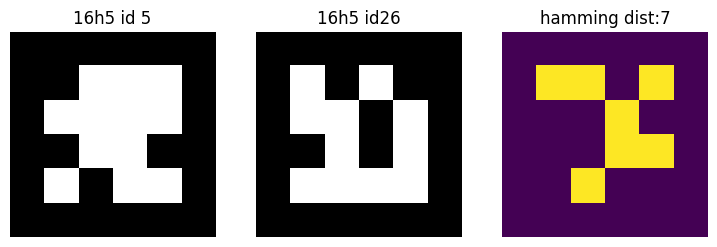

In [40]:
# display the differences between two tags
tagids = (np.random.randint(30) , np.random.randint(30))
print(f'comparing tags: {tagids}')
fig, axs = plt.subplots(1,3, figsize=(9,4))
arrs = [None, None]
for idx, ax in enumerate(axs.flatten()[:-1]):
    arrs[idx] = np.zeros([6,6])
    arrs[idx][1:-1,1:-1] = df.iloc[tagids[idx]]['ARRAY'].reshape(4,4)
    ax.imshow(arrs[idx], cmap='gray')
    ax.set_axis_off()
    ax.set_title(f'16h5 id{tagids[idx]:2d}', )

hd = np.count_nonzero(arrs[0]!=arrs[1])
axs[2].set_title(f'hamming dist:{hd}')
axs[2].imshow(arrs[0]!=arrs[1], cmap='viridis')
axs[2].set_axis_off()


#### make pdfs of the correct size
* forget it - was much easier to scale up with imagemagick and batch resize and save with irfanview
* now the pdf folder has all the pdfs, just print them at actual size and the black box will be 6in like in the rules